<a href="https://colab.research.google.com/github/Saswata020/Market_basket_Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Basket Analysis (MBA)
This repo contains the Market Basket Analysis (MBA) project as part of my data science portfolio.

There are two parts in this project:

1. [Understanding MBA](#understanding-mba)

2. [Implementation in Python](#implementation-in-python)

The first part - Understanding MBA is for beginners who are new to this technique. It explains the theory, applications and workings of MBA with a case study of a supermarket.

The second part - Implementation in Python contains the Python code to implement this technique using public dataset from Kaggle.

#Part_1

Market basket analysis (MBA), also known as association-rule mining, is a useful method of discovering customer purchasing patterns by extracting associations or co-occurrences from stores' transactional databases.

It is a modelling technique based upon the theory that if you buy a certain group of items, you are more (or less) likely to buy another group of items.



#EXAMPLE

For simplicity we are analyzing only 2 items  Bread and Butter. We want to know if there is any evidence that suggests that buying Bread leads to buying Butter.

Let's take the example of a supermarket which generates 1,000 transactions monthly, of which Bread was purchased in 150 transactions, Butter in 130 transactions, and both together in 50 transactions.

In set theory it can be represented as Bread only  100, Butter only  80, Bread and Butter 50, as shown in the Venn diagram below:
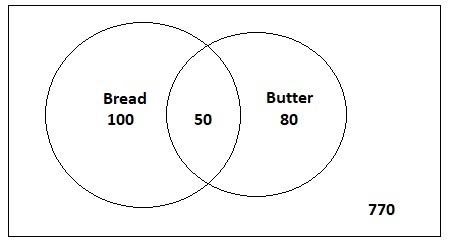



#Analysis and Findings

We can use MBA to extract the association rule between Bread and Butter. There are three metrics or criteria to evaluate the strength or quality of an association rule, which are support, confidence and lift.

#1. Support

Support measures the percentage of transactions containing a particular combination of items relative to the total number of transactions.

In our example, this is the percentage of transactions where both Bread and Butter are bought together. We need to calculate this to know if this combination of items is significant or negligible? Generally, we want a high percentage i.e. high support in order to make sure it is a useful relationship. Typically, we will set a threshold, for example we will only look at a combination if more than 1% of transactions have this combination.

Support (antecedent (Bread) and consequent (Butter)) = Number of transactions having both items / Total transactions

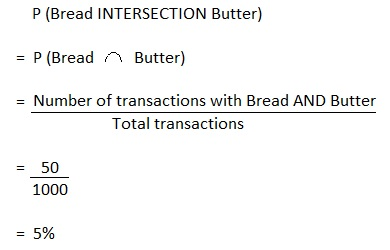

Result: The support value of 5% means 5% of all transactions have this combination of Bread and Butter bought together. Since the value is above the threshold of 1%, it shows there is indeed support for this association and thus satisfy the first criteria.

#2. Confidence

Confidence measures the probability of finding a particular combination of items whenever antecedent is bought. In probability terms, confidence is the conditional probability of the consequent given the antecedent and is represented as P (consequent / antecedent). In our example, it is the probability of both Bread and Butter being bought together whenever Bread is bought. Typically, we may set a threshold, say we want this combination to occur at least 25% of times when Bread is bought.

Confidence (antecedent i.e. Bread and consequent i.e. Butter) = P (Consequent (Butter) is bought GIVEN antecedent (Bread) is bought)

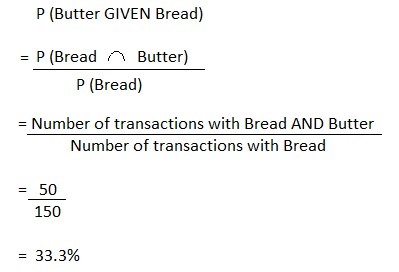

Result: The confidence value of 33.3% is above the threshold of 25%, indicating we can be confident that Butter will be bought whenever Bread is bought, and thus satisfy the second criteria.

#3. Lift
Lift is a metric to determine how much the purchase of antecedent influences the purchase of consequent. In our example, we want to know whether the purchase of Butter is independent of the purchase of Bread (or) is the purchase of Butter happening due to the purchase of Bread? In probability terms, we want to know which is higher, P (Butter) or P (Butter / Bread)? If the purchase of Butter is influenced by the purchase of Bread, then P (Butter / Bread) will be higher than P (Butter), or in other words, the ratio of P (Butter / Bread) over P (Butter) will be higher than 1.

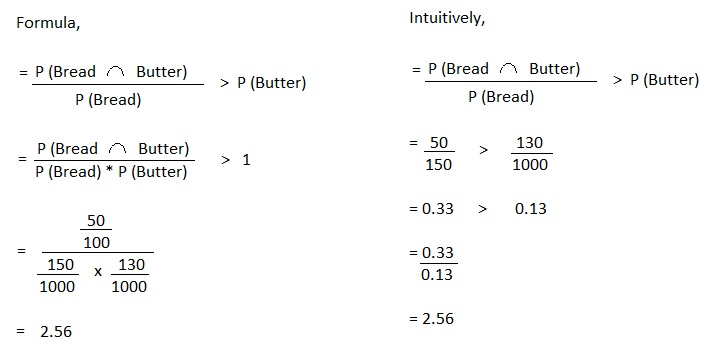

Result: The lift value of 2.56 is greater than 1, it shows that the purchase of Butter is indeed influenced by the purchase of Bread rather than Butter's purchase being independent of Bread. The lift value of 2.56 also means that Bread's purchase lifts the Butter's purchase by 2.56 times.

#Conclusion
Based on the findings above, we can justify our initial hypothesis as we

a) Have the support of 5% transactions for Bread and Butter in the same basket

b) Have 33.3% confidence that Butter sales happen whenever Bread is purchased.

c) Knows the lift in Butter's sales is 2.56 times more, whenever Bread is purchased than when Butter is purchased alone.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


#Introduction

**Company Background:** Company C, with a history spanning over two decades, operates multiple restaurants in Cyprus, categorized under various brands, each with its unique concept, location, and cuisine focus.

**Brand Struggles:** One of the original brands, specializing in Asian, primarily Chinese cuisine, is grappling with declining profit margins and growth due to intensifying competition and shifts in customer preferences and habits.

**Utilizing Sales Data:** Company C plans to harness its sales data to analyze customer behavior, pinpoint preferences, personalize offerings, and enhance operational efficiency to address the challenges faced by the struggling brand.

**Reversing the Process:** By leveraging data insights, Company C aims to rejuvenate the struggling brand's performance, turning the tide on declining profitability and fostering sustained growth in a fiercely competitive restaurant landscape.

#Key Problems
C has several questions that it hopes to get answers to:

* Are there any differences between dine-inn customers and delivery customers?
* Is the product offering adequate (e.g., do customers make strange * combination of products)?
* Are there any patterns in consumption that may indicate tendencies?

#By answering the previous questions, C expects to get insights that may be useful in terms:

* Creation of set menus
* Introduction of new products
* Understand substitute products
* Recommending/promoting cross-selling
* Customer segmentation
* Other possible results depending on the findings

#Dataset description
This dataset comprises data from all sales transactions made in one of the most popular restaurants of the chain in Nicosia, the capital of Cyprus. The dataset includes information about the items, including quantities and prices, as well as some customer details.

#Dataset Variables:
* **DocNumber:** number of the document. The document number repeats in as many rows as the rows in the original document (invoice)
* **ProductDesignation:** product designation
* **ProductFamily:** name of the family of the product. A product can only be member of one only family
* **Qty:** quantity
* **TotalAmount:** sale price of the total quantity
* **InvoiceDateHour:** date and hour when the document was issued
* **EmployeeID:** ID of the employee who issued the document
* **IsDelivery:** indication if sale was a delivery or a dine-inn (1:delivery, 0: dine-inn)
* **Pax:** number of persons at the table
* **CustomerID:** ID of the customer (if a customer record was assigned to the sale)
* **CustomerCity:** city of the customer (usually only employed in delivery)
* **CustomerSince:** date of creation of the customer

In [ ]:
# Install the 'joypy' package for joyplot visualization
!pip install joypy

# Install the 'yellowbrick' package for machine learning visualization tools
!pip install yellowbrick

# Upgrade the 'category_encoders' package, which is commonly used for encoding categorical variables
!pip install --upgrade category_encoders


In [29]:
# Import necessary libraries and modules

import os               # Operating system-specific functionality
import csv              # CSV file handling
import numpy as np      # Numerical computing library
from scipy import stats  # Scientific computing and statistics
import pandas as pd     # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization
from matplotlib import ticker  # Matplotlib utility for controlling axis tick locators and formatters
import seaborn as sns   # Data visualization based on Matplotlib
from math import ceil  # Math module for ceiling function
import joypy           # Library for joyplot visualization
from mpl_toolkits.mplot3d import Axes3D  # Toolkit for 3D plotting
from matplotlib import cm              # Colormap handling in Matplotlib
import plotly.express as px           # Interactive plotting library
import category_encoders as ce        # Categorical variable encoding
import collections                    # Container datatypes
from sklearn import preprocessing    # Data preprocessing
from datetime import datetime        # Date and time handling
from mlxtend.frequent_patterns import apriori  # Apriori algorithm for frequent itemset mining
from mlxtend.frequent_patterns import association_rules  # Association rules for frequent itemsets
import networkx as nx                # Network analysis
import re                            # Regular expressions
import compileall                    # Byte-compile source files
import warnings                      # Warning control

# Filter and suppress warnings
warnings.filterwarnings('ignore')


In [30]:
# Global definitions

# Get the current working directory
baseFolder = '/content/drive/MyDrive/#Machine Learning/2.Market_basket_analysis'

# Define a folder path for exports, using the current working directory and a subfolder named 'Exports'
exportsFolder = baseFolder + os.sep + 'Exports' + os.sep


In [31]:
# Font sizes for subplot titles and axis labels
subPlots_Title_fontSize = 12       # Font size for subplot titles
subPlots_xAxis_fontSize = 10       # Font size for x-axis labels in subplots
subPlots_yAxis_fontSize = 10       # Font size for y-axis labels in subplots
subPlots_label_fontSize = 10       # Font size for general labels in subplots
heatmaps_text_fontSize = 8         # Font size for text in heatmaps

# Font sizes and colors for main plot titles and legends
plots_Title_fontSize = 14          # Font size for main plot titles
plots_Title_textColour = 'black'   # Text color for main plot titles

plots_Legend_fontSize = 12         # Font size for legends in main plots
plots_Legend_textColour = 'black'  # Text color for legends in main plots


#2. Data understanding



In [33]:
# Load data from the restaurant
ds = pd.read_csv('/content/drive/MyDrive/#Machine Learning/2.Market_basket_analysis/raw.githubusercontent.com_davidocmartins_Business_Cases_Project_main_Supporting Files_Case2_AsianRestaurant_Cyprus_2018.txt', sep=";")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84109 entries, 0 to 84108
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DocNumber           84109 non-null  object 
 1   ProductDesignation  84109 non-null  object 
 2   ProductFamily       84109 non-null  object 
 3   Qty                 84109 non-null  float64
 4   TotalAmount         84109 non-null  object 
 5   InvoiceDateHour     84109 non-null  object 
 6   EmployeeID          84109 non-null  int64  
 7   IsDelivery          84109 non-null  int64  
 8   Pax                 84109 non-null  int64  
 9   CustomerID          84109 non-null  int64  
 10  CustomerCity        31248 non-null  object 
 11  CustomerSince       29142 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 7.7+ MB


In [36]:
ds.columns

Index(['DocNumber', 'ProductDesignation', 'ProductFamily', 'Qty',
       'TotalAmount', 'InvoiceDateHour', 'EmployeeID', 'IsDelivery', 'Pax',
       'CustomerID', 'CustomerCity', 'CustomerSince'],
      dtype='object')

In [37]:
# Display top 5 rows
ds.head(5)

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
0,TKD0320000012018,1/2 DUCK,STARTERS,1.0,"27,10",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
1,TKD0320000012018,SPRING ROLL,STARTERS,8.0,"17,60",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
2,TKD0320000012018,SWEET SOUR CHICKEN,MEAT,2.0,"20,20",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
3,TKD0320000012018,LEMON CHICKEN,MEAT,1.0,"10,10",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN
4,TKD0320000012018,BEEF BBS,SIZZLING,1.0,"12,60",2018-01-01 19:12:12.000,2,1,1,53908,LEYKOSIA,NaN


In [38]:
# Generate summary statistics for all variables in the dataset
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DocNumber,84109,11147,TK0110053522018,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductDesignation,84109,255,MINERAL WATER 1.5LT,7061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductFamily,84109,27,STARTERS,14148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qty,84109.0,NaN,NaN,NaN,1.261256,0.92378,1.0,1.0,1.0,1.0,53.0
TotalAmount,84109,374,"3,00",9733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDateHour,84109,11146,2018-12-24 22:59:54.000,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,84109.0,NaN,NaN,NaN,3.591221,3.682017,2.0,2.0,2.0,5.0,27.0
IsDelivery,84109.0,NaN,NaN,NaN,0.371518,0.483213,0.0,0.0,0.0,1.0,1.0
Pax,84109.0,NaN,NaN,NaN,3.3008,3.693792,0.0,1.0,2.0,4.0,200.0
CustomerID,84109.0,NaN,NaN,NaN,12633.06576,21952.076038,0.0,0.0,0.0,16429.0,69101.0


In [39]:
ds_original=ds.copy()

In [40]:
# Duplicated observations
ds.duplicated().sum()

3923

In [41]:
#Elimination of duplicated observations
ds.drop_duplicates(inplace=True)

### Product Designation

In [42]:
ds['ProductDesignation'].value_counts()

MINERAL WATER 1.5LT       5942
EGG FRIED RICE            4483
SPRING ROLL               4015
DELIVERY CHARGE           3889
SWEET SOUR CHICKEN        3575
                          ... 
CLASSIC ROLLS VEG            1
SORBET IND                   1
CLASSIC ROLLS CUCUMBER       1
SELCTION FOR  TWO            1
 NO BABY CORN                1
Name: ProductDesignation, Length: 255, dtype: int64

In [43]:
# Count the occurrences of the value 'KTIMA GEROVASSILIOU WHITE' in the 'ProductDesignation' column
count_of_KTIMA_GEROVASSILIOU_WHITE = ds['ProductDesignation'].value_counts()['KTIMA GEROVASSILIOU WHITE']


In [44]:
ds['ProductDesignation'].value_counts()['KTHMA GEROVASSILIOU WHITE']

20

In [45]:
# Update values in the 'ProductDesignation' column to correct a typo
ds.loc[ds['ProductDesignation'] == 'KTHMA GEROVASSILIOU WHITE', 'ProductDesignation'] = 'KTIMA GEROVASSILIOU WHITE'


In [46]:
ds['ProductDesignation'].value_counts()['KTIMA GEROVASSILIOU WHITE']

37

In [47]:
ds['ProductDesignation'].value_counts()['FOOD']

344

In [49]:
ds = ds[ds['ProductDesignation'] != 'FOOD']

In [48]:
ds['ProductDesignation'].value_counts()['SODA']

125

In [50]:
ds = ds[ds['ProductDesignation'] != 'SODA']

In [51]:
ds = ds[ds['ProductDesignation'] != 'DELIVERY CHARGE']

In [52]:
ds = ds[ds['ProductDesignation'] != 'TSANTA']

###Customer City

In [53]:
ds.loc[ds['CustomerCity'] == ' EGKOMI', 'CustomerCity'] = 'EGKOMI'

In [54]:
ds["CustomerCity"].replace(["LAKSTAMEIA","LAKATAME"], "LAKATAMEIA", inplace=True)

In [55]:
ds["CustomerCity"].replace(["STROBOLO", "STROBOLOS"], "STROVOLOS", inplace=True)

In [56]:
ds.loc[ds['CustomerCity'] == 'LEYKOSIA', 'CustomerCity'] = 'NICOSIA'

# Data Cleaning and Preprocessing

In [57]:
#creating a copy of the dataset
ds_bf_imputer = ds.copy()

In [58]:
#checking rhe missing values
ds.isna().sum()

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          49252
CustomerSince         51002
dtype: int64

# Outlier Removal

In [59]:
metric_features = ['Qty','TotalAmount','Pax']
non_metric_features = ['DocNumber','ProductDesignation','ProductFamily','EmployeeID','IsDelivery','CustomerID','CustomerCity']

In [60]:
# replace comma with dot in column B
ds['TotalAmount'] = ds['TotalAmount'].str.replace(',', '.')

# print the updated dataframe
ds

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince
0,TKD0320000012018,1/2 DUCK,STARTERS,1.0,27.10,2018-01-01 19:12:12.000,2,1,1,53908,NICOSIA,NaN
1,TKD0320000012018,SPRING ROLL,STARTERS,8.0,17.60,2018-01-01 19:12:12.000,2,1,1,53908,NICOSIA,NaN
2,TKD0320000012018,SWEET SOUR CHICKEN,MEAT,2.0,20.20,2018-01-01 19:12:12.000,2,1,1,53908,NICOSIA,NaN
3,TKD0320000012018,LEMON CHICKEN,MEAT,1.0,10.10,2018-01-01 19:12:12.000,2,1,1,53908,NICOSIA,NaN
4,TKD0320000012018,BEEF BBS,SIZZLING,1.0,12.60,2018-01-01 19:12:12.000,2,1,1,53908,NICOSIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
84103,TK0110054642018,JASMINE TEA,DRINKS,2.0,4.40,2018-12-31 22:45:17.000,2,0,9,0,NaN,NaN
84104,TK0110054642018,SWEET SOUR CHICKEN,MEAT,1.0,12.60,2018-12-31 22:45:17.000,2,0,9,0,NaN,NaN
84105,TK0110054642018,COKE,DRINKS,1.0,3.00,2018-12-31 22:45:17.000,2,0,9,0,NaN,NaN
84106,TK0110054642018,EGG FRIED RICE,RICE,1.0,6.90,2018-12-31 22:45:17.000,2,0,9,0,NaN,NaN


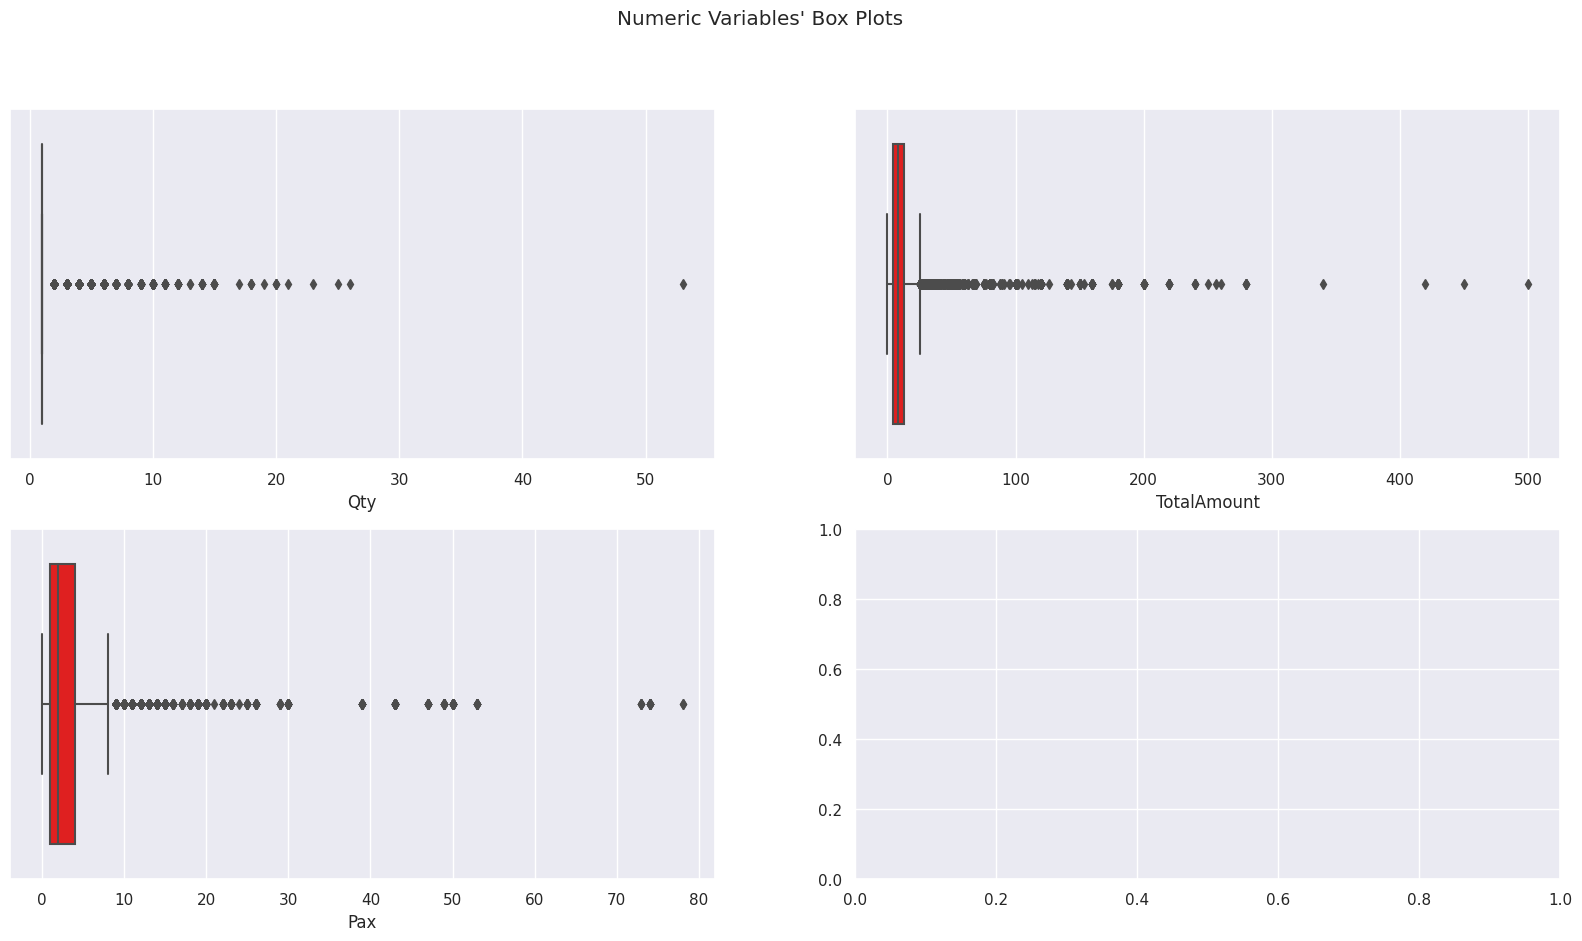

In [61]:
# All Numerical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 10))

# Plot data
for ax, feat in zip(axes.flatten(),metric_features):
    sns.boxplot(x=pd.to_numeric(ds[feat]), ax=ax, color="red")

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

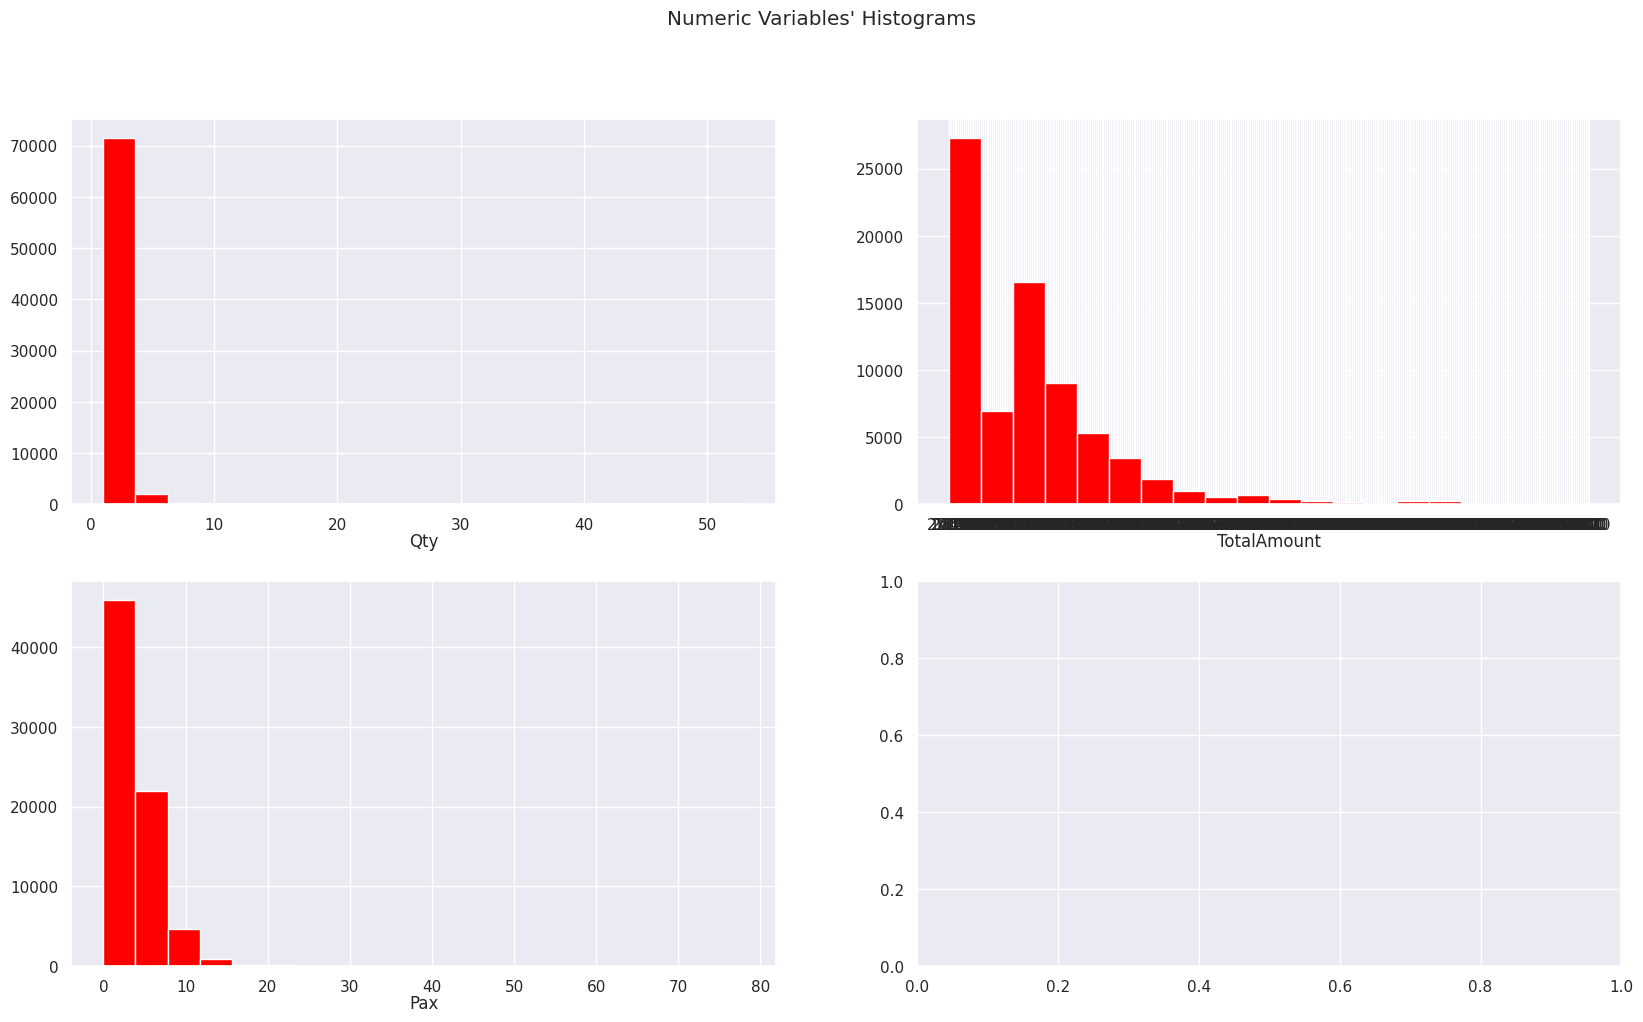

In [62]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11)) #defining the layout

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(ds[feat],bins=20, color = "red")
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

In [63]:
# convert relevant columns to numeric type
ds['Qty'] = pd.to_numeric(ds['Qty'])
ds['TotalAmount'] = pd.to_numeric(ds['TotalAmount'])
ds['Pax'] = pd.to_numeric(ds['Pax'])

#Removing outliers manually
filters= (
    (ds['Qty'] <= 30)
    &
    (ds['TotalAmount'] <= 400)
    &
    (ds['Pax'] <= 50)
)

ds2= ds[filters]

print('Percentage of data kept after removing outliers:', np.round(ds2.shape[0] / ds.shape[0], 4))

Percentage of data kept after removing outliers: 0.9996


In [64]:
ds_new = ds2.copy()

### Feature Engeneering

In [85]:
# Load data from extra datasets (Holidays and Weather)
dsextra = pd.read_excel('/content/drive/MyDrive/#Machine Learning/2.Market_basket_analysis/Extra_datasets.xlsx')
dsextra['W1'] = dsextra['W1'].fillna('Clear')
dsextra[['Holiday1']] = dsextra[['Holiday1']].fillna('No Holiday')
dsextra['Observations'] = dsextra['Observations'].fillna('Clear')
dsextra.drop(['Day','Text Date','Holiday2'], axis=1, inplace = True)
#dsextra = dsextra.rename(columns={'Date': 'InvoiceDateHour'})
dsextra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     133 non-null    datetime64[ns]
 1   Holiday1                 133 non-null    object        
 2   W1                       133 non-null    object        
 3   Observations             133 non-null    object        
 4   RainCondition            133 non-null    object        
 5   StatusHeavyRain          133 non-null    int64         
 6   ThunstormCondition       133 non-null    object        
 7   StatusThurnstorm         133 non-null    int64         
 8   HolidaysCondition        133 non-null    object        
 9   StatusHolidays           133 non-null    int64         
 10  Widespread Dust Cond.    133 non-null    object        
 11  Status Widespread Dust   133 non-null    int64         
dtypes: datetime64[ns](1), int64(4), obje

In [86]:
dsextra.head(2)

,Date,Holiday1,W1,Observations,RainCondition,StatusHeavyRain,ThunstormCondition,StatusThurnstorm,HolidaysCondition,StatusHolidays,Widespread Dust Cond.,Status Widespread Dust
0,2018-01-01,New Year's Day,Clear,Clear,No Heavy Rain,0,No Thunderstorm,0,Holiday,1,No Widespread,0
1,2018-01-03,No Holiday,Rain,"Showers of Heavy Rain, Recent Rain, Showers of...",Heavy Rain,1,No Thunderstorm,0,No Holiday,0,No Widespread,0


In [87]:
#Droping unecessary columns and change names of the ones that stay form dsextra
dsextra = dsextra.drop(['Holiday1', 'W1','Observations','RainCondition','ThunstormCondition','Widespread Dust Cond.','HolidaysCondition'], axis=1)
dsextra = dsextra.rename(columns={'StatusHeavyRain': 'Weather_Heavy_Rain', 'StatusThurnstorm': 'Weather_Storm', 'Status Widespread Dust ': 'Weather_Dust'})

In [88]:
datetime = ['InvoiceDateHour','CustomerSince']
date_string = '2005-12-06 15:00:00.000'
date_format = '%Y-%m-%d %H:%M:%S.%f'
date_time = pd.to_datetime(date_string, format=date_format)
ds_new['InvoiceDateHour'] = pd.to_datetime(ds_new['InvoiceDateHour'], format='%Y-%m-%d')

# extract the date part using dt accessor
ds_new["Date"] = ds_new["InvoiceDateHour"].dt.date
ds_new['Date'] = pd.to_datetime(ds_new['Date'], format='%Y-%m-%d')

# Changing the date format for the Dsextra data frame to merge with the main dataset to get the days of rain and public holidays
dsextra['Date'] = pd.to_datetime(dsextra['Date'], format='%d/%m/%Y')

In [89]:
ds_new= ds_new.reset_index(drop=True)
ds_both = pd.merge(ds_new, dsextra, on='Date', how='left')
ds_both.head(4)

,DocNumber,ProductDesignation,ProductFamily,Qty,TotalAmount,InvoiceDateHour,EmployeeID,IsDelivery,Pax,CustomerID,CustomerCity,CustomerSince,Date,Weather_Heavy_Rain,Weather_Storm,StatusHolidays,Weather_Dust
0,TKD0320000012018,1/2 DUCK,STARTERS,1.0,27.1,2018-01-01 19:12:12,2,1,1,53908,NICOSIA,NaN,2018-01-01,0.0,0.0,1.0,0.0
1,TKD0320000012018,SPRING ROLL,STARTERS,8.0,17.6,2018-01-01 19:12:12,2,1,1,53908,NICOSIA,NaN,2018-01-01,0.0,0.0,1.0,0.0
2,TKD0320000012018,SWEET SOUR CHICKEN,MEAT,2.0,20.2,2018-01-01 19:12:12,2,1,1,53908,NICOSIA,NaN,2018-01-01,0.0,0.0,1.0,0.0
3,TKD0320000012018,LEMON CHICKEN,MEAT,1.0,10.1,2018-01-01 19:12:12,2,1,1,53908,NICOSIA,NaN,2018-01-01,0.0,0.0,1.0,0.0


In [90]:
#Creating the following variables: Month & MonthName, Day & Day Name
ds_both['Month_12'] = ds_both['InvoiceDateHour'].dt.month
ds_both['Day_365'] = ds_both['InvoiceDateHour'].dt.day

# Extract the month name and day name variables
ds_both['MonthName'] = ds_both['InvoiceDateHour'].dt.strftime('%B')
ds_both['DayName'] = ds_both['InvoiceDateHour'].dt.strftime('%A')

In [91]:
ds_both.columns

Index(['DocNumber', 'ProductDesignation', 'ProductFamily', 'Qty',
       'TotalAmount', 'InvoiceDateHour', 'EmployeeID', 'IsDelivery', 'Pax',
       'CustomerID', 'CustomerCity', 'CustomerSince', 'Date',
       'Weather_Heavy_Rain', 'Weather_Storm', 'StatusHolidays', 'Weather_Dust',
       'Month_12', 'Day_365', 'MonthName', 'DayName'],
      dtype='object')

In [93]:
#Creating Meal Time variable
# Define function to classify hour as lunch time, dinner time, or other
def classify_hour(hour):
    if 12 <= hour <= 15:
        return 'Lunch'
    elif 18 <= hour <= 23:
        return 'Dinner'
    else:
        return 'other'

# Apply function to create hour variable with classification
ds_both['MealTime'] = ds_both['InvoiceDateHour'].apply(lambda x: classify_hour(x.hour))

In [94]:
#Creating the variables 'DaysAsCustomer' and 'YearsAsCustomer' - tells us for how many days/years the person has been a client
import datetime
last_date = datetime.datetime(2018, 12, 31)
ds_both['CustomerSince'] = pd.to_datetime(ds_both['CustomerSince'], format=date_format)

# Calculate the number of days since the start date for each customer
ds_both['DaysAsCustomer'] = (last_date - ds_both['CustomerSince']).dt.days

# Define the age bins
age_bins = [0, 365, 730, 1095, 1460, 1825, float('inf')]  # 1 year, 2 years, ..., 5+ years

# Assign each customer to an age bin based on their customer age
ds_both['YearsAsCustomer'] = pd.cut(ds_both['DaysAsCustomer'], bins=age_bins, labels=['<1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years'])

In [95]:
#Creating a feature for seasons

###https://cyprus.com/seasons-in-cyprus-and-packing/

# Define a function to map each date to its corresponding season
def get_season(date):
    year = date.year
    seasons = [('winter', (pd.to_datetime(str(year) + '-12-21'), pd.to_datetime(str(year+1) + '-03-19'))), #dez-mar
               ('spring', (pd.to_datetime(str(year) + '-03-20'), pd.to_datetime(str(year) + '-06-20'))), # 20 of mar to 20 of june
               ('summer', (pd.to_datetime(str(year) + '-06-21'), pd.to_datetime(str(year) + '-09-21'))), # 21 of june to 21 of september
               ('autumn', (pd.to_datetime(str(year) + '-09-22'), pd.to_datetime(str(year) + '-12-20')))]  # 22 september to 20 december
    for season, (start, end) in seasons:
        if start <= date <= end:
            return season
    else:
        return 'winter'

# Apply the function to the date column to create a new season column
ds_both['Season'] = ds_both['InvoiceDateHour'].apply(get_season)

In [96]:
ds_both = ds_both.set_index('CustomerID')

In [97]:
ds_both.columns

Index(['DocNumber', 'ProductDesignation', 'ProductFamily', 'Qty',
       'TotalAmount', 'InvoiceDateHour', 'EmployeeID', 'IsDelivery', 'Pax',
       'CustomerCity', 'CustomerSince', 'Date', 'Weather_Heavy_Rain',
       'Weather_Storm', 'StatusHolidays', 'Weather_Dust', 'Month_12',
       'Day_365', 'MonthName', 'DayName', 'MealTime', 'DaysAsCustomer',
       'YearsAsCustomer', 'Season'],
      dtype='object')

In [98]:
#Reorganizing the dataset
ds_both = ds_both[['DocNumber','EmployeeID','ProductDesignation', 'ProductFamily','Qty','TotalAmount','Pax','IsDelivery','CustomerCity'
                   ,'CustomerSince','DaysAsCustomer','YearsAsCustomer','InvoiceDateHour','MealTime','Date','Day_365','DayName'
                   ,'Month_12','MonthName','Season','StatusHolidays','Weather_Heavy_Rain','Weather_Storm','Weather_Dust']]
ds_both.head()

,DocNumber,EmployeeID,ProductDesignation,ProductFamily,Qty,TotalAmount,Pax,IsDelivery,CustomerCity,CustomerSince,...,Date,Day_365,DayName,Month_12,MonthName,Season,StatusHolidays,Weather_Heavy_Rain,Weather_Storm,Weather_Dust
CustomerID,,,,,,,,,,,,,,,,,,,,,
53908,TKD0320000012018,2,1/2 DUCK,STARTERS,1.0,27.1,1,1,NICOSIA,NaT,...,2018-01-01,1,Monday,1,January,winter,1.0,0.0,0.0,0.0
53908,TKD0320000012018,2,SPRING ROLL,STARTERS,8.0,17.6,1,1,NICOSIA,NaT,...,2018-01-01,1,Monday,1,January,winter,1.0,0.0,0.0,0.0
53908,TKD0320000012018,2,SWEET SOUR CHICKEN,MEAT,2.0,20.2,1,1,NICOSIA,NaT,...,2018-01-01,1,Monday,1,January,winter,1.0,0.0,0.0,0.0
53908,TKD0320000012018,2,LEMON CHICKEN,MEAT,1.0,10.1,1,1,NICOSIA,NaT,...,2018-01-01,1,Monday,1,January,winter,1.0,0.0,0.0,0.0
53908,TKD0320000012018,2,BEEF BBS,SIZZLING,1.0,12.6,1,1,NICOSIA,NaT,...,2018-01-01,1,Monday,1,January,winter,1.0,0.0,0.0,0.0
